'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

<IPython.core.display.Javascript object>


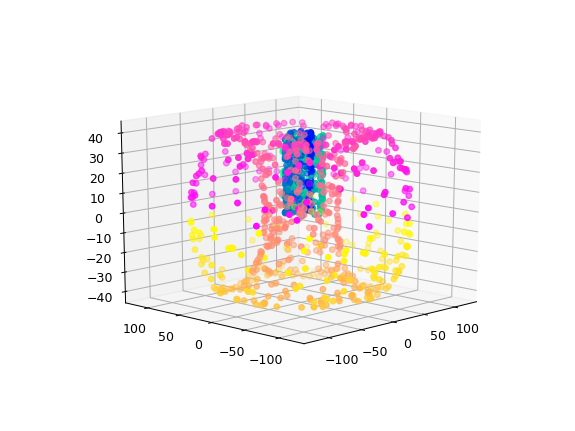

In [9]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=100, r=15)
torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
roll = roll*2

data = np.concatenate([torus, roll, sphere], axis=0)
labels = np.concatenate([y_t, y_r, y_s], axis=0)
#tadasets.plot3d(data)
cmaps = [plt.cm.winter, plt.cm.spring]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for data, color, cmap in zip([roll, torus],[y_r, y_t], cmaps):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color, cmap=cmap)

plt.show()

'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

<IPython.core.display.Javascript object>


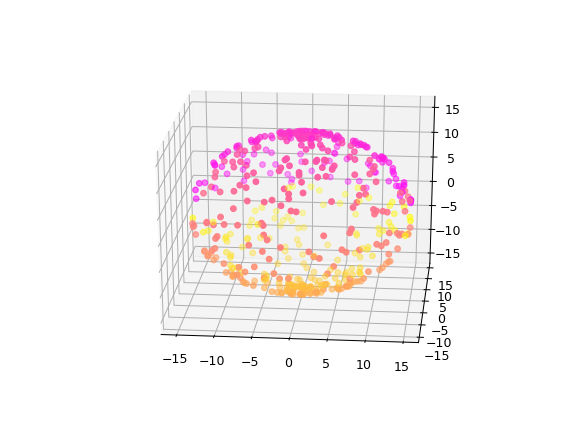

(500, 3)

In [10]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)
cmaps = plt.cm.winter
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
data.shape
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_s, cmap=cmap)

plt.show()

# 3d-2d vis

'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

<IPython.core.display.Javascript object>


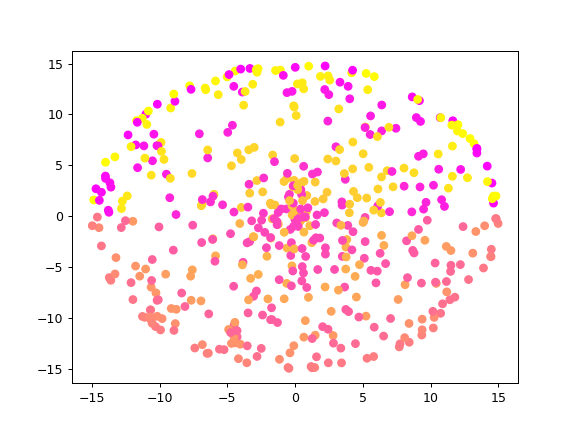

(500, 3)

In [11]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)
cmaps = plt.cm.winter
fig = plt.figure()
ax = fig.add_subplot(111)
data.shape
ax.scatter(data[:, 0], data[:, 1], c=y_s, cmap=cmap)

plt.show()

# Gnerate Solid Sphere

In [13]:
def sphere(n=100, r=1, noise=None, ambient=None):
    """
        Sample `n` data points on a sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """

    theta = np.random.random((n,)) * 2.0 * np.pi
    phi = np.random.random((n,)) * np.pi
    rad = np.ones((n,)) * r

    data = np.zeros((n, 3))

    data[:, 0] = rad * np.cos(theta) * np.cos(phi)
    data[:, 1] = rad * np.cos(theta) * np.sin(phi)
    data[:, 2] = rad * np.sin(theta)

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        data = embed(data, ambient)

    return data, theta

def solid_sphere(n=100, r=1, noise=None, ambient=None):
    """
        Sample `n` data points on a sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """
    
    theta = np.random.random((n,)) * 2.0 * np.pi
    theta.shape
    phi = np.random.random((n,)) * np.pi
    rad = np.ones((n,)) * r

    data = np.zeros((n, 3))

    data[:, 0] = rad * np.cos(theta) * np.cos(phi)
    data[:, 1] = rad * np.cos(theta) * np.sin(phi)
    data[:, 2] = rad * np.sin(theta)

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        data = embed(data, ambient)

    return data, theta

def dsphere(n=100, d=2, r=1, noise=None, ambient=None):
    """
    Sample `n` data points on a d-sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """
    data = np.random.randn(n, d + 1)

    # Normalize points to the sphere
    data = r * data / np.sqrt(np.sum(data ** 2, 1)[:, None])

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        assert ambient > d, "Must embed in higher dimensions"
        data = embed(data, ambient)

    return data

def scatter_sphere(x,y,typeD='3d'):
#     cmaps = plt.cm.winter
    cmaps = plt.cm.winter
    fig = plt.figure()
    if typeD is '3d':
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=cmap)
    else:
        ax = fig.add_subplot(111)
        ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)
    plt.show()

    

(4000, 3)

<IPython.core.display.Javascript object>


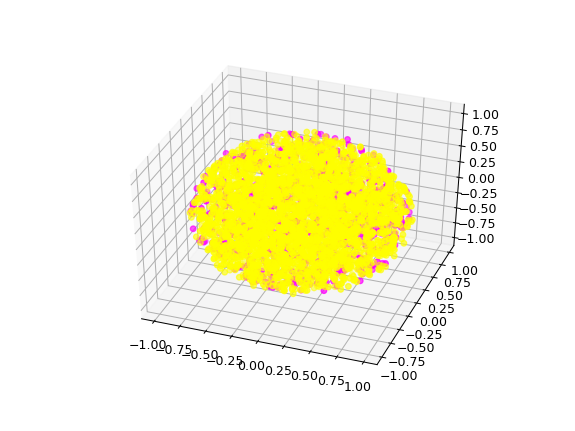

4000

,0,1,2,label
0,0.232570,-0.747747,0.002939,0
1,0.797385,-0.183171,-0.451091,0
2,0.482456,0.624408,-0.276485,0
3,-0.175243,0.862036,-0.156066,0
4,-0.327423,-0.169971,-0.091489,0
...,...,...,...,...
3995,0.421431,-0.633777,-0.016238,1
3996,-0.411157,0.748154,0.021721,1
3997,0.716865,-0.185668,0.336282,1
3998,-0.446242,-0.163274,0.727747,1


In [14]:
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import math
import pandas as pd

# sphere, y_s = solid_sphere(n=500, r=15)
n = 500
r = 15
d = 2
theta = np.random.random((n,)) * 2.0 * np.pi
# theta
phi = np.random.random((n,)) * np.pi
rad = np.ones((n,)) * r

data = np.zeros((n, 3))

data[:, 0] = rad * np.sin(theta) * np.cos(phi)
data[:, 1] = rad * np.sin(theta) * np.sin(phi)
data[:, 2] = rad * np.cos(theta)
# theta belone [0,2pi]  phi belone[0,pi]
# data.shape

# scatter_sphere(data, theta, '3d')


# d = 3;                               /* dimension = number of variables */
# N = 1000;                            /* sample size = number of obs     */
# radius = 2;                          /* radius of circle */
# Y = randfun(N // d, "Normal");       /* Y ~ MVN(0, I(d)) */
# u = randfun(N, "Uniform");           /* U ~ U(0,1)       */
# r = radius * u##(1/d);               /* r proportional to d_th root of U */
# X = r # Y / sqrt(Y[,##]);


def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

def random_ball_num (numpointsAll, dimension, radiusAll=[1,1], num=2, ratio=1):
    from numpy import random, linalg
    dataAll = []
    yAll = []
    for i in range(num):
        radius = radiusAll[i]
        # First generate random directions by normalizing the length of a
        # vector of random-normal values (these distribute evenly on ball).
        num_points = numpointsAll[i]
        random_directions = random.normal(size=(dimension,num_points))
        random_directions /= linalg.norm(random_directions, axis=0)
        # Second generate a random radius with probability proportional to
        # the surface area of a ball with a given radius.
        random_radii = random.random(num_points) ** (1/dimension)
        # Return the list of random (direction & length) points.
        tmp = radius * (random_directions * random_radii).T
        tmp_ratio = np.zeros(tmp.shape)
        tmp_ratio[:,2]=ratio
        tmp = tmp + i*tmp_ratio
        y_s = np.zeros(num_points,dtype=int)+i
        dataAll.append(tmp)
        yAll.extend(y_s.flatten().astype('int'))
    dataAll = np.vstack(dataAll)
#     yAll = np.vstack(yAll)
    return dataAll,yAll

# data = random_ball(1000,3,1)
# data.shape
# scatter_sphere(data, y_s)
# type(data)
scale = [1,0.8,0.5,0.2,0]
point_num = [1000,3000]
dimension = 3
data,y_s = random_ball_num(point_num,dimension,[1,1],2,0)
# data = np.vstack(data)
data.shape
scatter_sphere(data, y_s)
feature = range(dimension)
df = pd.DataFrame(data,columns=feature)
label = 'label'
len(y_s)
# y_s = y_s.flatten().astype('int') #vstack 把2个label 弄成2,1000 维的，摊开成20000
df[label] = y_s
df
# tmp = np.zeros(data.shape)
# tmp[:,0] = 1
# tmp

# Metric_Overlapping

In [6]:
from sklearn.neighbors  import kneighbors_graph
from sklearn.preprocessing import normalize

A = kneighbors_graph(df[feature],20,include_self=False)
edges_x1, edges_x2 = A.nonzero()
num_labels = len(np.unique(y_s))
overlap_label = np.zeros((num_labels,num_labels))
for x1, x2 in zip(edges_x1, edges_x2):
    overlap_label[y_s[x1]][y_s[x2]]+=1
overlap_label
# overlap_label = normalize(overlap_label, axis=0)
overlap_label = overlap_label/overlap_label.sum(axis=1,keepdims=1)
for i in range(num_labels):
    overlap_label[i][i] = 0
overlap_label


array([[ 4736., 15264.],
       [15111., 44889.]])

array([[0.     , 0.7632 ],
       [0.25185, 0.     ]])

# 2D ball

In [7]:
n = 1000
u = np.random.random((n))
v = np.random.random((n))
r = u**0.5  # sqrt function
theta = 2* np.pi *v
data[:,0] = r*np.cos(theta)
data[:,1] = r*np.sin(theta)
y = np.ones(n)
scatter_sphere(data,y,'2d')

ValueError: could not broadcast input array from shape (1000) into shape (4000)

<IPython.core.display.Javascript object>


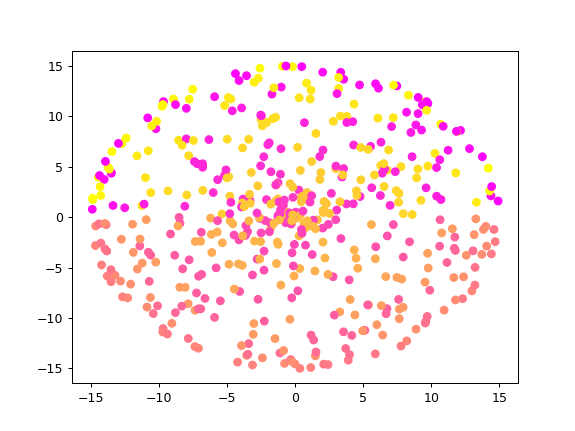

(500, 3)

In [8]:
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)

fig = plt.figure()
ax = fig.add_subplot(111)
data.shape
ax.scatter(data[:, 0], data[:, 1], c=y_s, cmap=cmap)

plt.show()

In [ ]:
from spheres import create_sphere_dataset
n_samples = 500
d = 100
n_spheres = 11
r = 5
seed = 42
# def __init__(self, train=True, n_samples=500, d=100, n_spheres=11, r=5,
#                 test_fraction=0.1, seed=42):
        #here pos are actually class labels, just conforming with parent class!
data, labels = create_sphere_dataset(n_samples, d, n_spheres, r, seed=seed)
data.shape
labels